## 2. Random Walk on Networks
***

### Packages
***

In [12]:
library(igraph)
library(resample)
library(textTinyR)
library(Matrix)
library(pracma)
library(latex2exp)
set.seed(100)

### 1. Random walk on Erdo ̈s-R ́enyi networks
***

#### (a) Create an undirected random network with 900 nodes, and the probability p for drawing an edge between any pair of nodes equal to 0.015.

> Ans: The undirected random network with n=900 and p=0.015 is generated in the below cell.

In [13]:
g <- sample_gnp(n=900, p=0.015, directed=FALSE)
fprintf("diameter: %d", diameter(g))

diameter: 5

#### (b) Let a random walker start from a randomly selected node (no teleportation). We use t to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) ⟨s(t)⟩ of the walker from his starting point at step t. Also, measure the variance σ2(t) = ⟨(s(t) − ⟨s(t)⟩)2⟩ of this distance. Plot ⟨s(t)⟩ v.s. t and σ2(t) v.s. t. Here, the average ⟨·⟩ is over random choices of the starting nodes.

> Ans: The result is in the below cell. Here, we use gcc (giant connected component) to run random walk when the original graph is not connected to avoid falling into small subgraph.

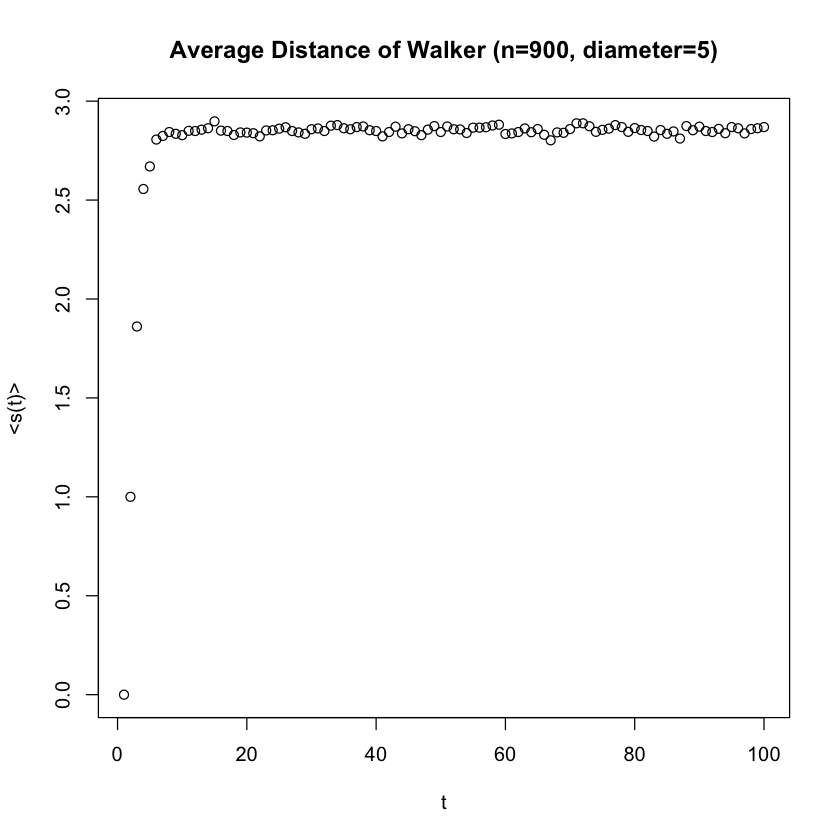

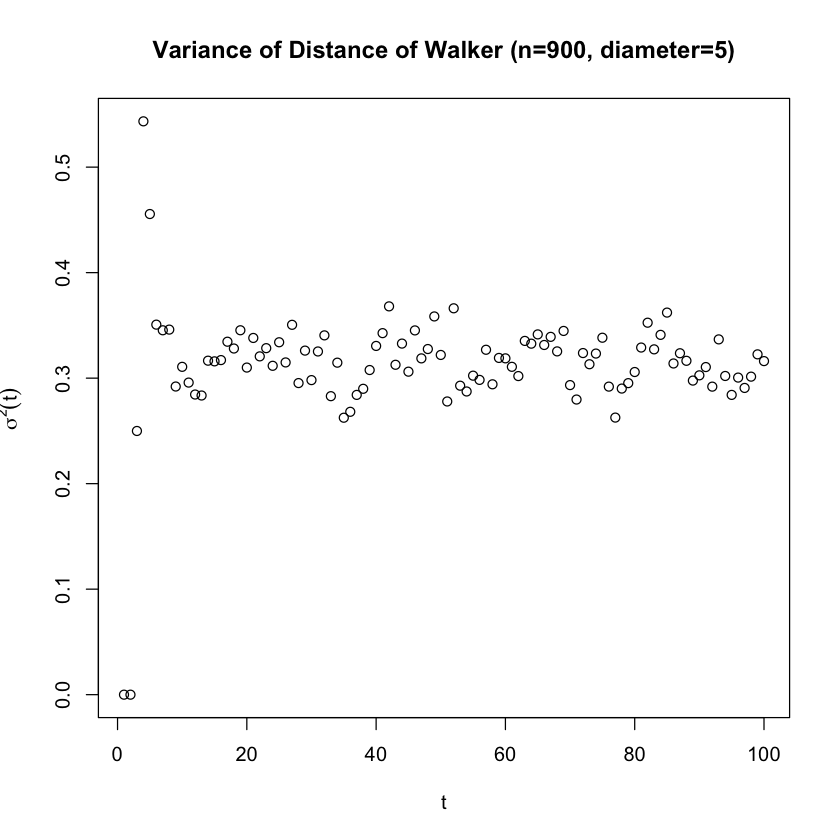

In [14]:
get_gcc <- function(g){
    if(is_connected(g)){
            gcc <- g
        }
        else{
            g_components <- components(g)
            gcc_idx <- which.max(g_components$csize)
            gcc <- induced_subgraph(g, which(g_components$membership == gcc_idx))
        }
    
    return(gcc)
}

run_random_walk_and_plot <- function(g, n, max_steps=100, n_trail=1000){
    shortest_lens <- matrix(0, nrow=n_trail, ncol=max_steps)
    for(i in 1:n_trail){
        gcc <- get_gcc(g)
        
        v_start <- sample(V(gcc), 1)
        vs <- random_walk(gcc, v_start, max_steps)
        shortest_lens[i,] <- shortest.paths(gcc, vs, v_start)
    }
    
    means <- colMeans(shortest_lens)
    vars <- colVars(shortest_lens)
    
    plot(means, xlab="t", ylab="<s(t)>", main=paste("Average Distance of Walker (n=", n, ", diameter=", diameter(g), ")", sep=""))
    plot(vars, xlab="t", ylab=TeX("$\\sigma^2(t)$"), main=paste("Variance of Distance of Walker (n=", n, ", diameter=", diameter(g), ")", sep=""))
}

run_random_walk_and_plot(g, 900)

#### (c) Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph?

> Ans: The degree distribution of the nodes reached at the end of the random walk and the degree distribution of graph are similar, which follow binomial distribution.

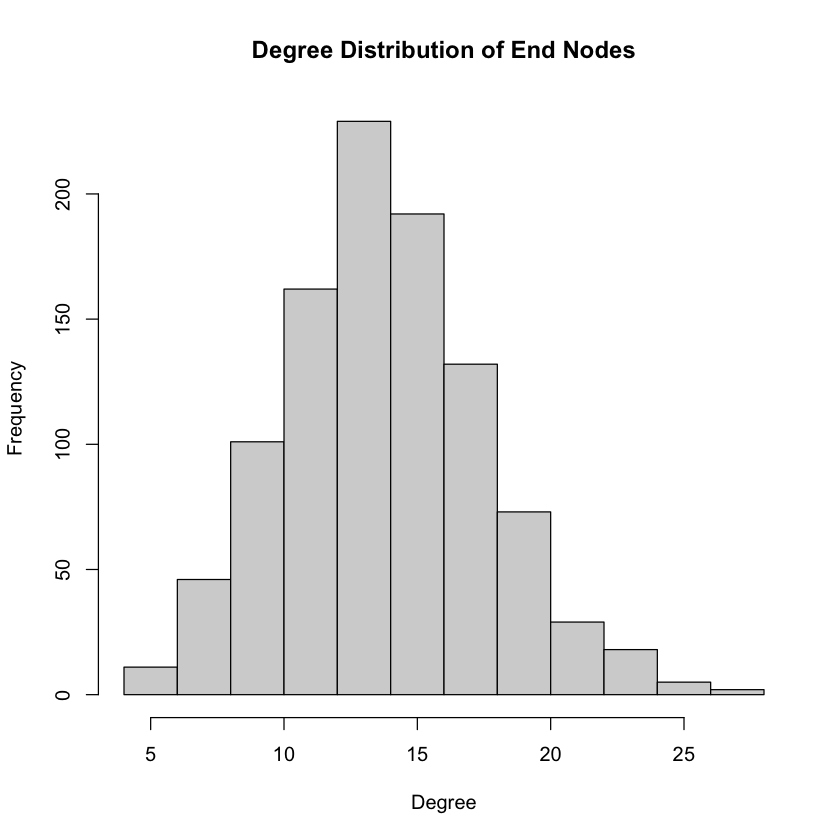

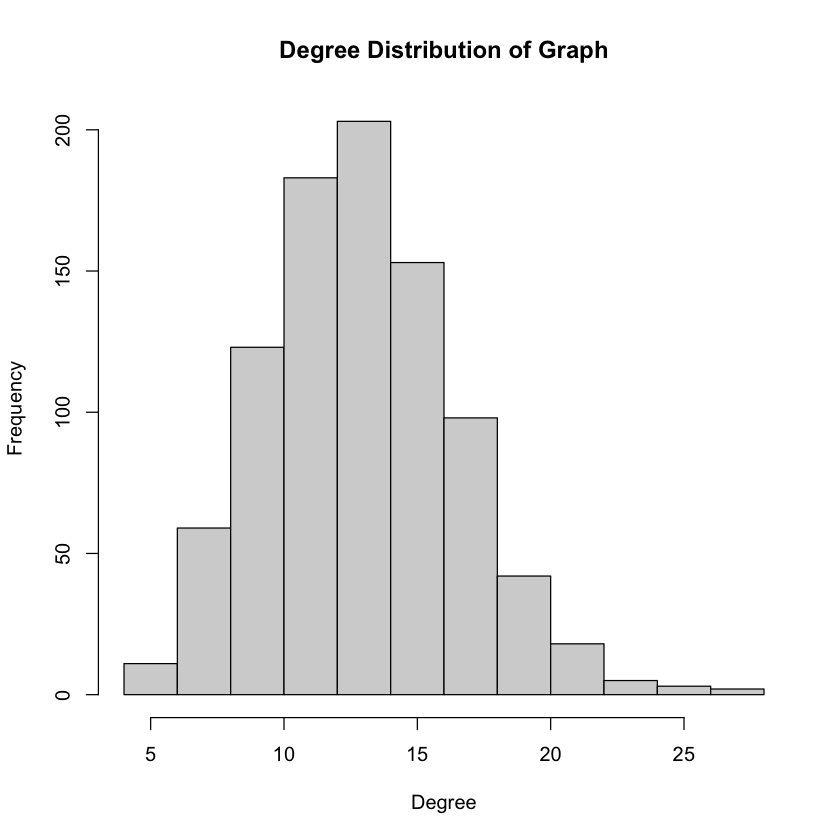

In [15]:
get_end_node_degrees <- function(g, max_steps=100, n_trail=1000){
    end_node_degrees <- matrix(0, nrow=n_trail, ncol=1)
    for(i in 1:n_trail){
        gcc <- get_gcc(g)

        v_start <- sample(V(gcc), 1)
        vs <- random_walk(gcc, v_start, max_steps)
        end_node_degrees[i,1] <- degree(gcc, vs[length(vs)])
    }

    return (end_node_degrees)
}

end_node_degrees <- get_end_node_degrees(g)

hist(end_node_degrees, main="Degree Distribution of End Nodes", xlab="Degree", ylab="Frequency")
hist(degree(g), main="Degree Distribution of Graph", xlab="Degree", ylab="Frequency")

#### (d) Repeat 1(b) for undirected random networks with 9000 nodes. Compare the results and explain qualitatively. Does the diameter of the network play a role?

> Ans: Yes, the diameter of the network plays a role. The diameter decreases from 5 to 3 when we increase the number of nodes from 900 to 9000. This indicates that the larger network concentrates to the starting node more. Therefore, the number of steps needed to reach the steady state should be lower too. We can observe this result from the comparison between the network with 900 nodes and the network with 9000 nodes. For network with 900 nodes, it needs 7 steps to converage while there is only 4 steps with 9000 nodes. Moreover, on average, the average and the variance of shortest path length after reaching the steady state are 2.85 and 0.32 for the network with 900 nodes, which are both larger than with 9000 nodes (average=2.11, variance=0.13). 

diameter: 3

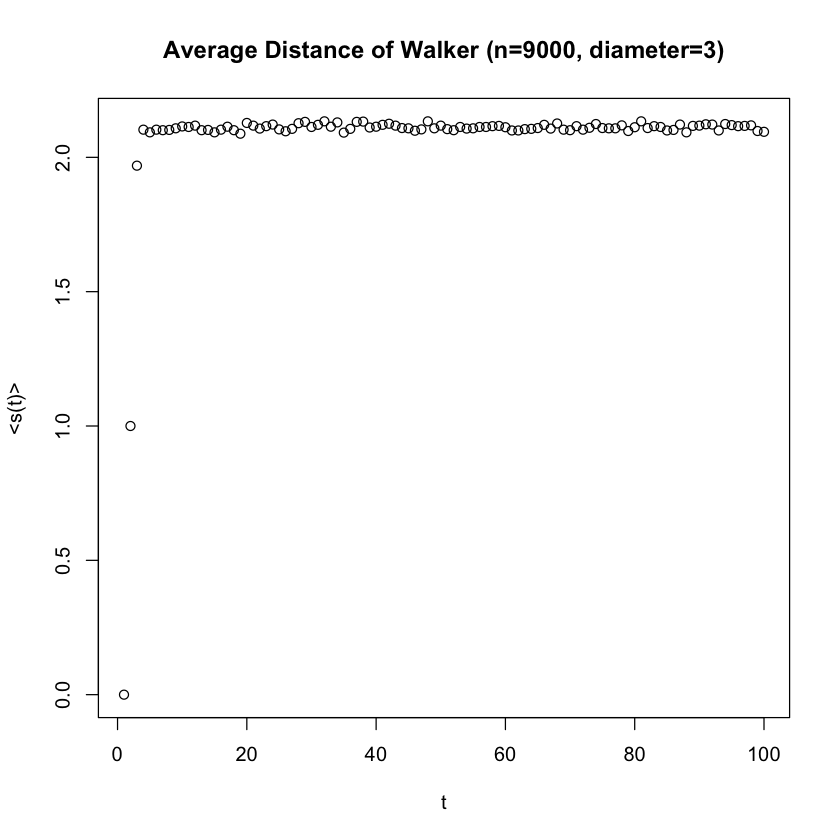

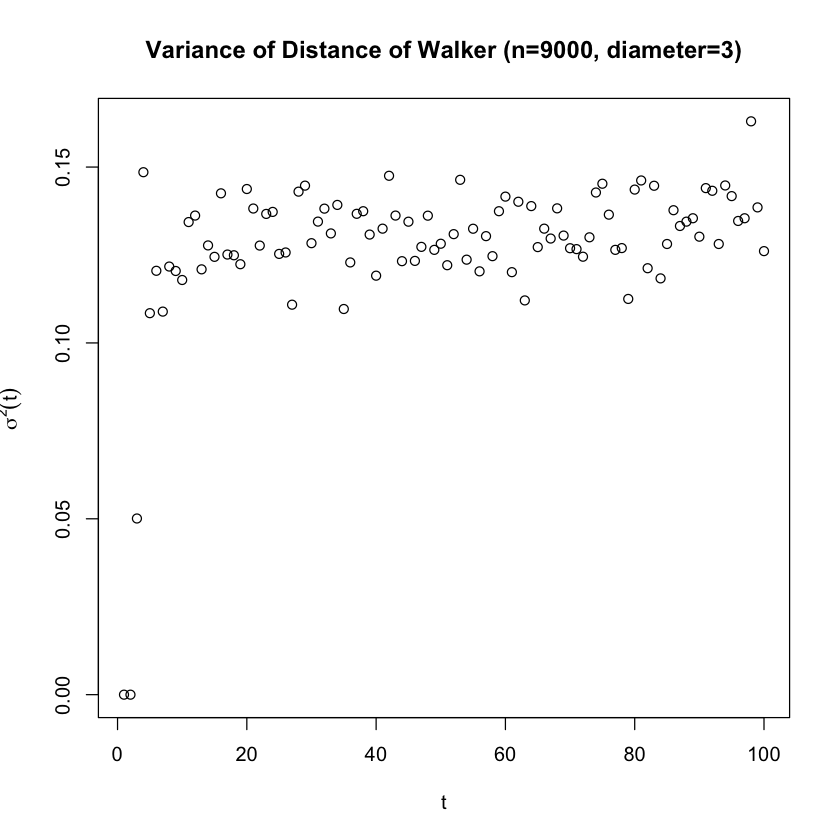

In [17]:
g <- sample_gnp(n=9000, p=0.015, directed=FALSE)
fprintf("diameter: %d", diameter(g))

run_random_walk_and_plot(g, 9000)

### 2. Random walk on networks with fat-tailed degree distribution
***

#### (a) Generate an undirected preferential attachment network with 900 nodes, where each new node attaches to m = 1 old nodes.

> Ans: The undirected preferential attachment network with n=900 and m=1 is generated in the below cell.

In [18]:
g <- sample_pa(n=900, m=1, directed=FALSE)
fprintf("diameter: %d", diameter(g))

diameter: 19

#### (b) Let a random walker start from a randomly selected node. Measure and plot ⟨s(t)⟩ v.s. t and σ2(t) v.s. t.

> Ans: The result is in the below cell. Here, we also use gcc to run random walk when the original graph is not connected for the same reason as 1(b).

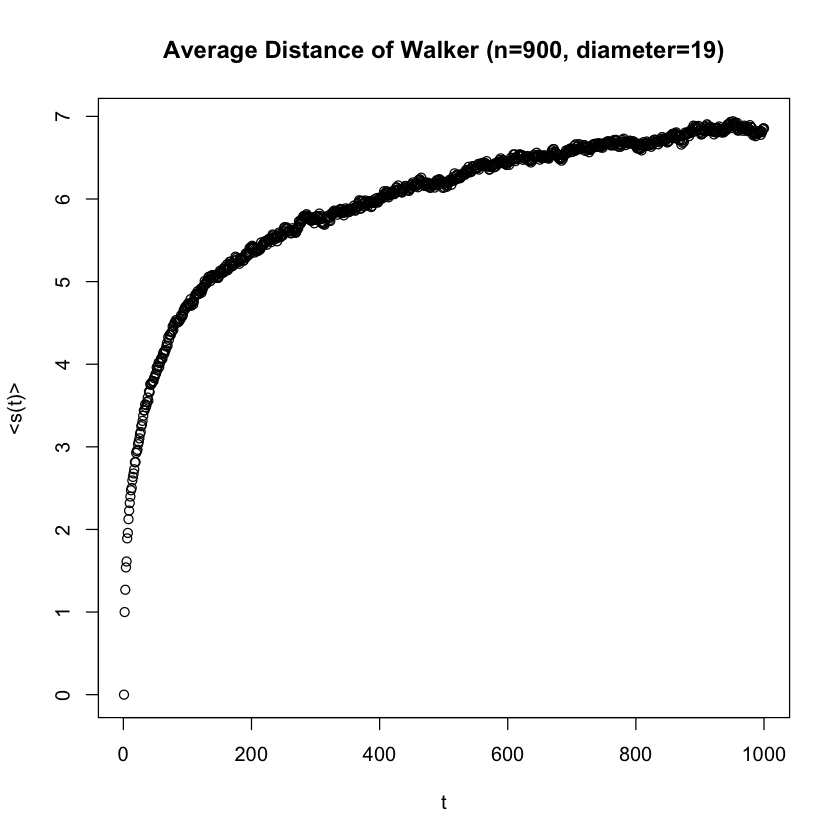

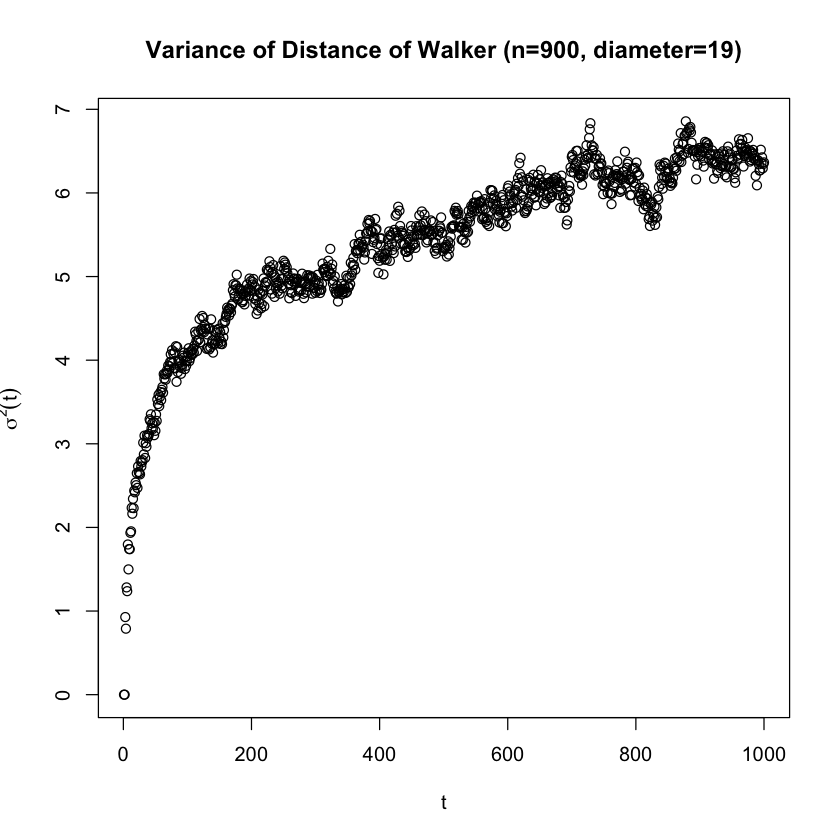

In [19]:
run_random_walk_and_plot(g, 900, max_steps=1000)

#### (c) Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph?

> Ans: The degree distribution of the nodes reached at the end of the random walk and the degree distribution of graph are similar, which follow power-law distribution.

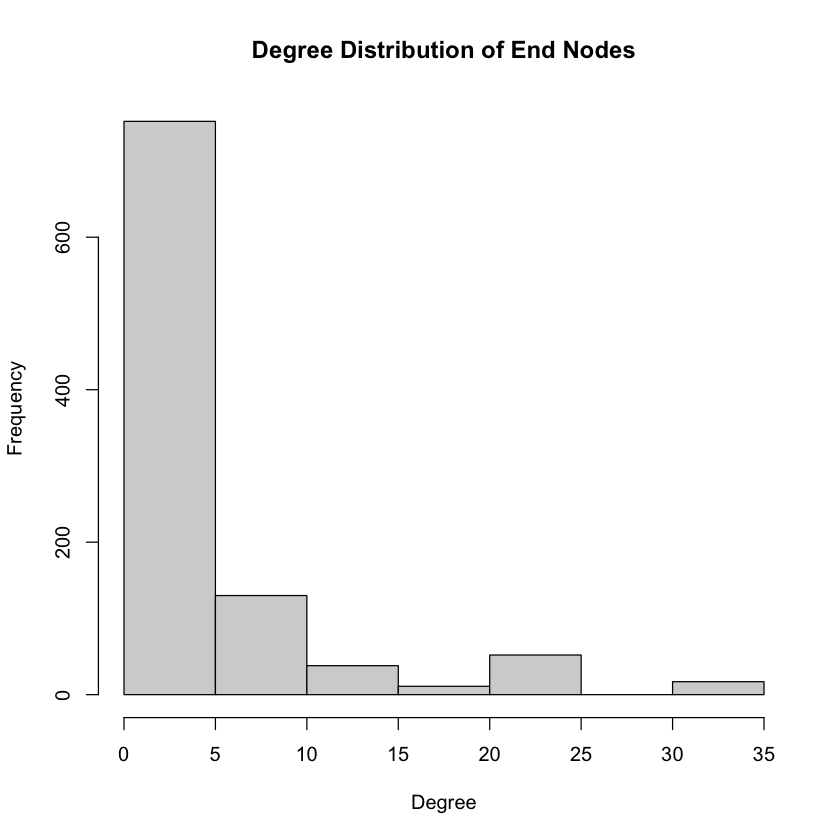

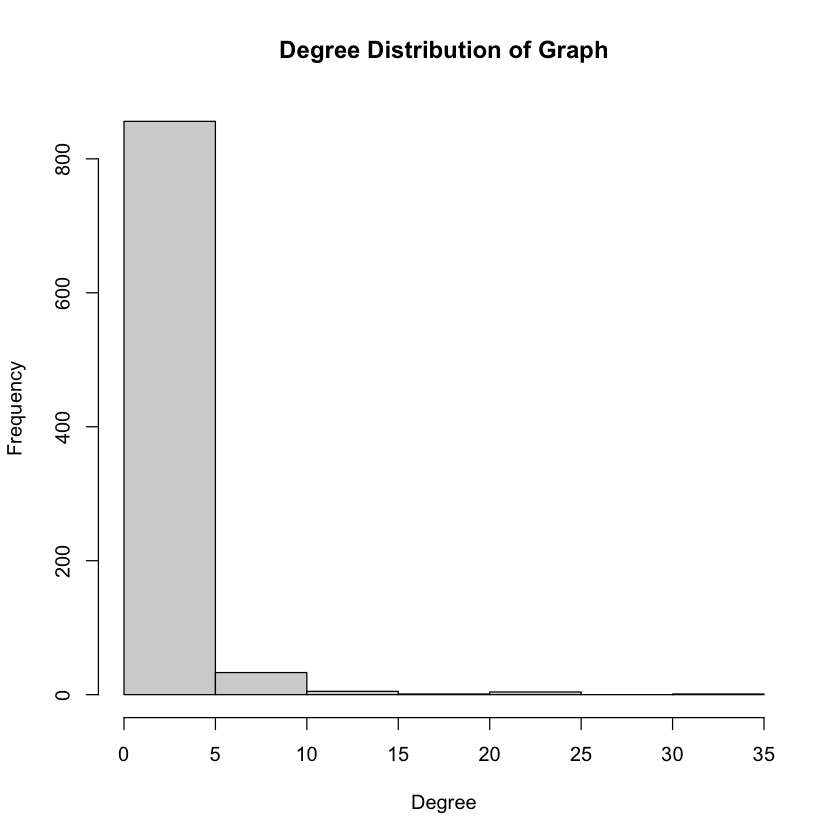

In [25]:
end_node_degrees <- get_end_node_degrees(g)

hist(end_node_degrees, main="Degree Distribution of End Nodes", xlab="Degree", ylab="Frequency")
hist(degree(g), main="Degree Distribution of Graph", xlab="Degree", ylab="Frequency")

#### (d) Repeat 2(b) for preferential attachment networks with 90 and 9000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?

> Ans: Yes, the diameter of the network plays a role. When we increase the number of nodes from 90, 900 to 9000, the diameter increases from 14, 19 to 28. This implies that the larger network has sparser distribution around the starting node. As a result, the number of steps required to reach the steady state should be higher as well. The results of the network with 90 nodes, 900 nodes, and 9000 nodes help to support this statement. Averagely, after reaching the steady state, (1) the average of shortest path length are 5.20, 6.84, and 9.23, (2) the variance of shortest path length are 6.10, 6.41, 8.90, (3) the number of steps to converage are 400, 900, 4000, for 90, 900, 9000 nodes respectively. All the values have the positive correlation with the number of nodes.

n=90, diameter: 14

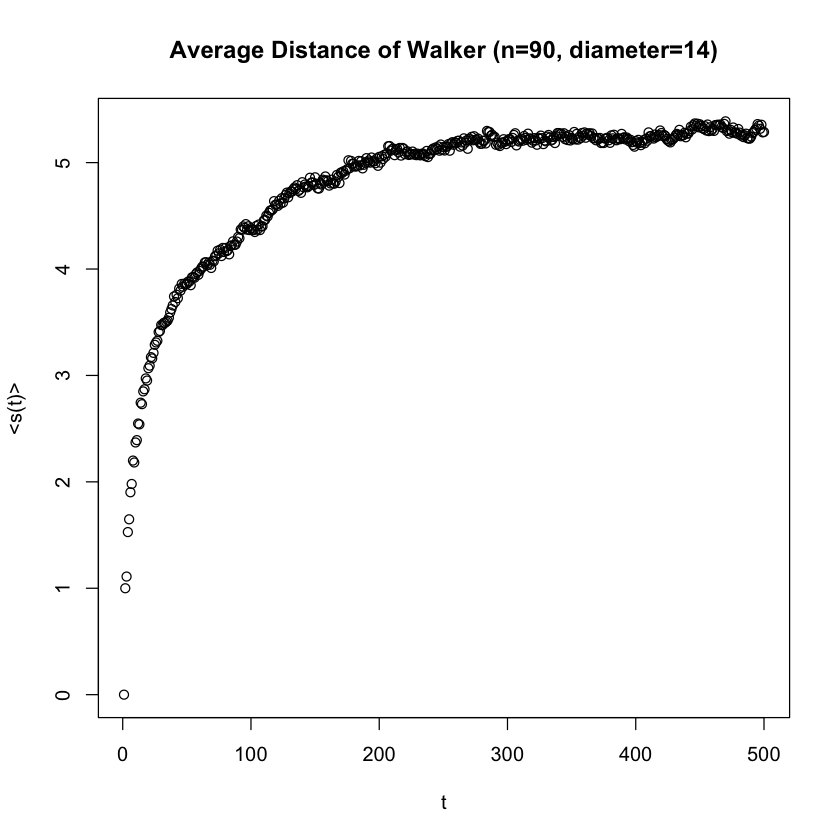

n=9000, diameter: 28

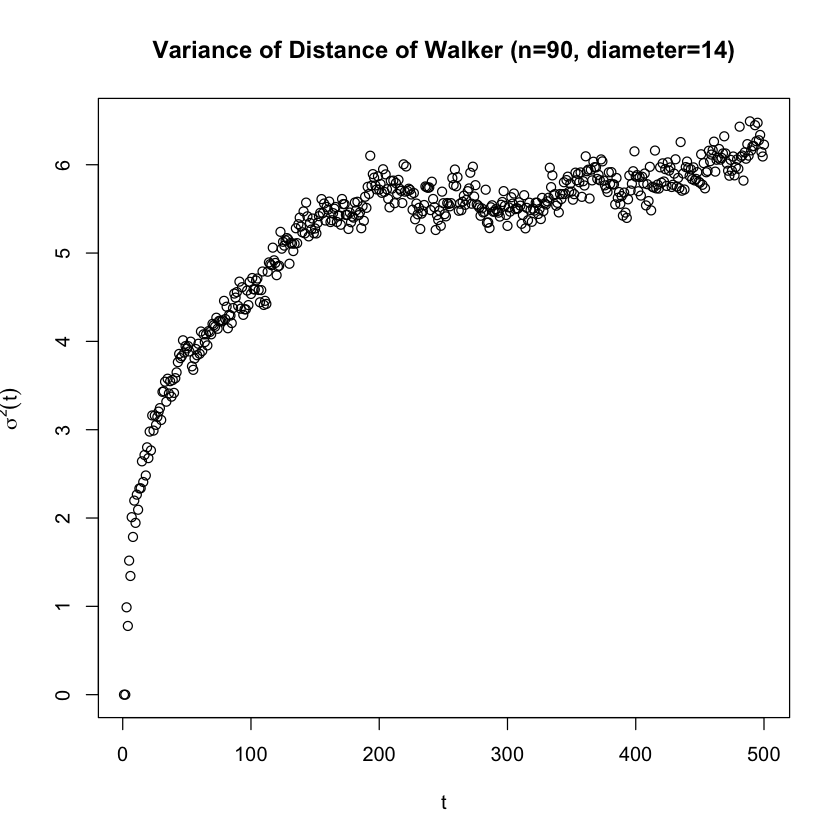

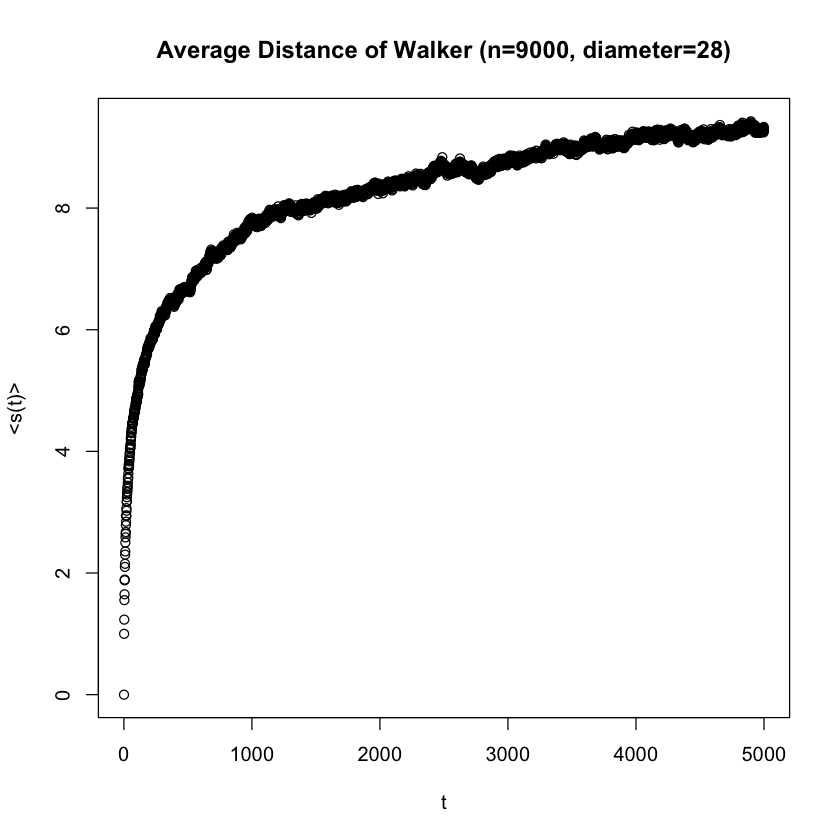

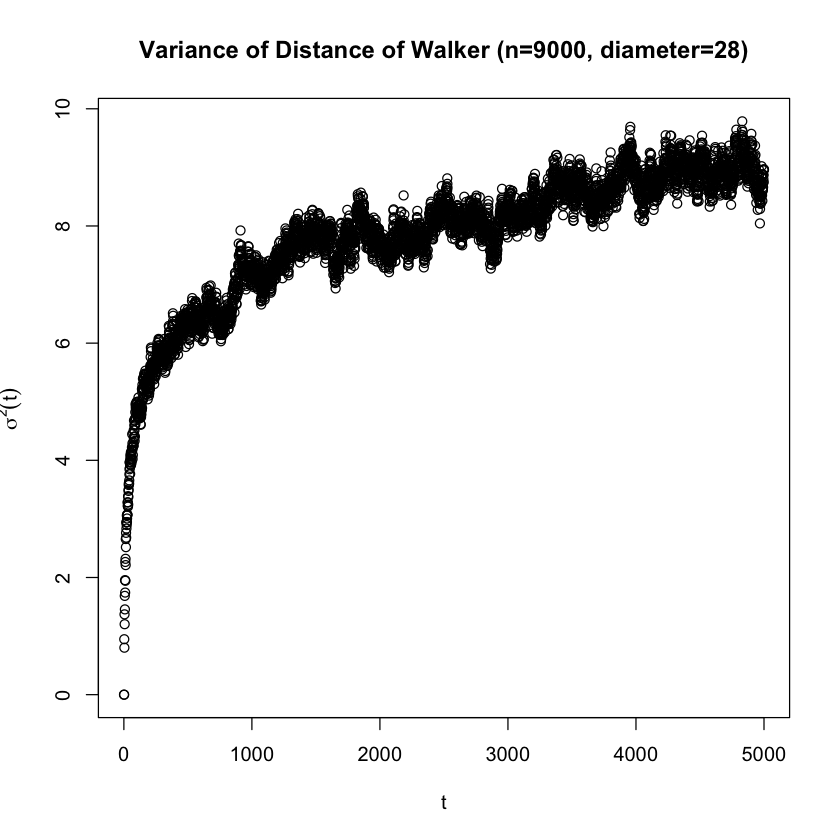

In [26]:
ns <- c(90, 9000)
max_steps_list <- c(500, 5000)
for(i in 1:2){
    g <- sample_pa(n=ns[i], m=1, directed=FALSE)
    fprintf("n=%d, ", ns[i])
    fprintf("diameter: %d", diameter(g))
    run_random_walk_and_plot(g, ns[i], max_steps=max_steps_list[i])
}